In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:

# Define reusable functions for data analysis
def load_csv_file(file_path):
    """Load CSV file and return DataFrame"""
    expanded_path = os.path.expanduser(file_path)
    print(f"Loading data from: {expanded_path}")
    try:
        df = pd.read_csv(expanded_path)
        print(f"Data shape: {df.shape}")
        print(f"Columns: {list(df.columns)}")
        return df
    except FileNotFoundError:
        print(f"Error: File not found: {expanded_path}")
        return None
    except Exception as e:
        print(f"Error loading file: {e}")
        return None

def print_statistics(data, label="Data"):
    """Print statistics for a data series"""
    print(f"\n{label} Statistics:")
    print(f"Count: {data.count()}")
    print(f"Mean: {data.mean():.4f}")
    print(f"Std: {data.std():.4f}")
    print(f"Min: {data.min():.4f}")
    print(f"Max: {data.max():.4f}")

def create_histogram(data, title="Distribution", bins=50, color='blue', alpha=0.7, figsize=(10, 6)):
    """Create a histogram with statistics box"""
    plt.figure(figsize=figsize)
    plt.hist(data.dropna(), bins=bins, alpha=alpha, edgecolor='black', linewidth=0.5, color=color)
    plt.xlabel('Relaxed eHull (eV/atom)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # Add statistics text box
    stats_text = f'Count: {data.count()}\nMean: {data.mean():.4f}\nStd: {data.std():.4f}'
    plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

def create_comparative_histogram(datasets, title="Comparison of Relaxed eHull Distributions", 
                               figsize=(12, 8), bins=50, alpha=0.6, remove_outliers=True, outlier_threshold=10.0):
    """Create a comparative histogram with multiple datasets
    
    Parameters:
    -----------
    datasets : dict
        Dictionary containing dataset information with 'ehull_data' key
    title : str
        Title for the plot
    figsize : tuple
        Figure size
    bins : int
        Number of histogram bins
    alpha : float
        Transparency of histogram bars
    remove_outliers : bool
        Whether to remove outliers greater than outlier_threshold
    outlier_threshold : float
        Threshold value (eV/atom) above which data points are considered outliers
    """
    plt.figure(figsize=figsize)
    
    colors = ['blue', 'red', 'green', 'orange', 'purple']
    
    # Plot histograms for each dataset
    for i, (name, data_dict) in enumerate(datasets.items()):
        color = colors[i % len(colors)]
        
        # Get the data and apply outlier filtering if requested
        data = data_dict['ehull_data'].dropna()
        
        if remove_outliers:
            # Filter out outliers greater than the threshold
            original_count = len(data)
            data = data[data <= outlier_threshold]
            removed_count = original_count - len(data)
            if removed_count > 0:
                print(f"{name}: Removed {removed_count} outliers (>{outlier_threshold} eV/atom) from {original_count} total points")
        
        plt.hist(data, bins=bins, alpha=alpha, 
                label=name, edgecolor='black', linewidth=0.5, color=color)
    
    plt.xlabel('Un-Relaxed eHull (eV/atom)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Add statistics text boxes
    y_position = 0.98
    y_step = 0.23
    box_colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lightgray']
    
    for i, (name, data_dict) in enumerate(datasets.items()):
        if i >= len(box_colors):
            break
        
        # Get filtered data for statistics
        data = data_dict['ehull_data'].dropna()
        if remove_outliers:
            data = data[data <= outlier_threshold]
        
        stats_text = f'{name}:\nCount: {data.count()}\nMean: {data.mean():.4f}\nStd: {data.std():.4f}'
        
        plt.text(0.02, y_position, stats_text, transform=plt.gca().transAxes, 
                verticalalignment='top', bbox=dict(boxstyle='round', 
                facecolor=box_colors[i % len(box_colors)], alpha=0.8))
        y_position -= y_step
    
    plt.tight_layout()
    plt.show()

# Load the CSV file
file_path = "/home/user_wanglei/private/datafile/crystalgpt/csp/alex20/csp-6000f/adam_bs_8000_lr_0.0001_decay_0_clip_1_A_119_W_28_N_21_a_1_w_1_l_1_Nf_5_Kx_16_Kl_4_h0_256_l_16_H_16_k_64_m_64_e_32_drop_0.1_0.1/relaxed_structures_Pr4Ni3O10_2700_ehull.csv"

#file_path = "/home/user_wanglei/private/datafile/crystalgpt/csp/alex20s/csp-07d3f/adam_bs_8000_lr_0.0001_decay_0_clip_1_A_119_W_28_N_21_a_1_w_1_l_1_Nf_5_Kx_16_Kl_4_h0_256_l_16_H_16_k_64_m_64_e_32_drop_0.1_0.1/relaxed_structures_Pr4Ni3O10_1300_ehull.csv"

print(f"Loading data from: {file_path}")

Loading data from: /home/user_wanglei/private/datafile/crystalgpt/csp/alex20/csp-6000f/adam_bs_8000_lr_0.0001_decay_0_clip_1_A_119_W_28_N_21_a_1_w_1_l_1_Nf_5_Kx_16_Kl_4_h0_256_l_16_H_16_k_64_m_64_e_32_drop_0.1_0.1/relaxed_structures_Pr4Ni3O10_2700_ehull.csv


In [3]:
# Load the data using the function
df = load_csv_file(file_path)

if df is not None:
    # Load both relaxed_ehull and unrelaxed_ehull columns if they exist
    if 'relaxed_ehull' in df.columns:
        relaxed_ehull_data = df['relaxed_ehull']
    else:
        relaxed_ehull_data = None
        print("Column 'relaxed_ehull' not found in the dataframe.")

    if 'unrelaxed_ehull' in df.columns:
        unrelaxed_ehull_data = df['unrelaxed_ehull']
    else:
        unrelaxed_ehull_data = None
        print("Column 'unrelaxed_ehull' not found in the dataframe.")

    print_statistics(unrelaxed_ehull_data, "Unrelaxed eHull")
    print_statistics(relaxed_ehull_data, "Relaxed eHull")

Loading data from: /home/user_wanglei/private/datafile/crystalgpt/csp/alex20/csp-6000f/adam_bs_8000_lr_0.0001_decay_0_clip_1_A_119_W_28_N_21_a_1_w_1_l_1_Nf_5_Kx_16_Kl_4_h0_256_l_16_H_16_k_64_m_64_e_32_drop_0.1_0.1/relaxed_structures_Pr4Ni3O10_2700_ehull.csv
Data shape: (100, 6)
Columns: ['initial_energy', 'final_energy', 'relaxed_cif', 'formula', 'unrelaxed_ehull', 'relaxed_ehull']

Unrelaxed eHull Statistics:
Count: 100
Mean: 899.8901
Std: 8778.3662
Min: -0.0119
Max: 87802.4885

Relaxed eHull Statistics:
Count: 100
Mean: 0.6910
Std: 3.8027
Min: -0.0236
Max: 38.2558


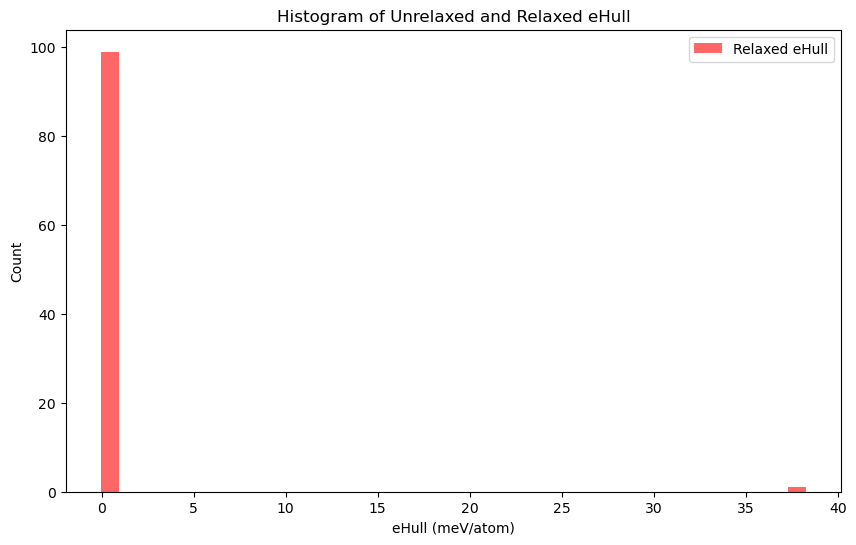

In [4]:
import matplotlib.pyplot as plt

if (unrelaxed_ehull_data is not None) and (relaxed_ehull_data is not None):
    plt.figure(figsize=(10, 6))
    #plt.hist(unrelaxed_ehull_data.dropna(), bins=40, alpha=0.6, label='Unrelaxed eHull', color='skyblue')
    plt.hist(relaxed_ehull_data.dropna(), bins=40, alpha=0.6, label='Relaxed eHull', color='red')
    plt.xlabel('eHull (meV/atom)')
    plt.ylabel('Count')
    plt.title('Histogram of Unrelaxed and Relaxed eHull')
    plt.legend()
    plt.show()
  
else:
    print("One or both of the required columns ('unrelaxed_ehull', 'relaxed_ehull') are missing.")


In [5]:
# Load both CSV files for comparison
#base_path = "/home/user_wanglei/private/datafile/crystalgpt/csp/alex20/csp-92792//adam_bs_8000_lr_0.0001_decay_0_clip_1_A_119_W_28_N_21_a_1_w_1_l_1_Nf_5_Kx_16_Kl_4_h0_64_l_8_H_16_k_64_m_64_e_32_drop_0.3_0.1"

base_path = "/home/user_wanglei/private/datafile/crystalgpt/csp/alex20s/csp-a20de/adam_bs_8000_lr_0.0001_decay_0_clip_1_A_119_W_28_N_21_a_1_w_1_l_1_Nf_5_Kx_16_Kl_4_h0_256_l_16_H_16_k_64_m_64_e_32_drop_0.1_0.1/"

finetune_path = "/home/user_wanglei/private/datafile/crystalgpt/csp/alex20/csp-3546b/TaCr2O6_ppo_5_beta_0.1_adam_bs_500_lr_1e-05_decay_0_clip_1_A_119_W_28_N_21_Nf_5_Kx_16_Kl_4_h0_256_l_16_H_16_k_64_m_64_e_32_drop_0/"


In [6]:

file_paths = {
    'epoch_6000': f"{base_path}/relaxed_structures_Cd3As2_6000_ehull.csv",
    'epoch_7900': f"{base_path}/relaxed_structures_Cd3As2_7900_ehull.csv",
    #'finetune': f"{finetune_path}/relaxed_structures_TaCr2O6_1020_ehull.csv"
}

# Load data for both files
datasets = {}
for name, path in file_paths.items():
    df = load_csv_file(path)
    if df is not None:
        datasets[name] = {
            'df': df,
            'ehull_data': df['relaxed_ehull']
        }
        print_statistics(datasets[name]['ehull_data'], name)


Loading data from: /home/user_wanglei/private/datafile/crystalgpt/csp/alex20s/csp-a20de/adam_bs_8000_lr_0.0001_decay_0_clip_1_A_119_W_28_N_21_a_1_w_1_l_1_Nf_5_Kx_16_Kl_4_h0_256_l_16_H_16_k_64_m_64_e_32_drop_0.1_0.1//relaxed_structures_Cd3As2_6000_ehull.csv
Data shape: (300, 6)
Columns: ['initial_energy', 'final_energy', 'relaxed_cif', 'formula', 'unrelaxed_ehull', 'relaxed_ehull']

epoch_6000 Statistics:
Count: 300
Mean: 0.6745
Std: 4.1862
Min: 0.0146
Max: 37.5726
Loading data from: /home/user_wanglei/private/datafile/crystalgpt/csp/alex20s/csp-a20de/adam_bs_8000_lr_0.0001_decay_0_clip_1_A_119_W_28_N_21_a_1_w_1_l_1_Nf_5_Kx_16_Kl_4_h0_256_l_16_H_16_k_64_m_64_e_32_drop_0.1_0.1//relaxed_structures_Cd3As2_7900_ehull.csv
Data shape: (300, 6)
Columns: ['initial_energy', 'final_energy', 'relaxed_cif', 'formula', 'unrelaxed_ehull', 'relaxed_ehull']

epoch_7900 Statistics:
Count: 300
Mean: 0.4419
Std: 3.0220
Min: 0.0145
Max: 37.3929


epoch_6000: Removed 4 outliers (>10.0 eV/atom) from 300 total points
epoch_7900: Removed 2 outliers (>10.0 eV/atom) from 300 total points


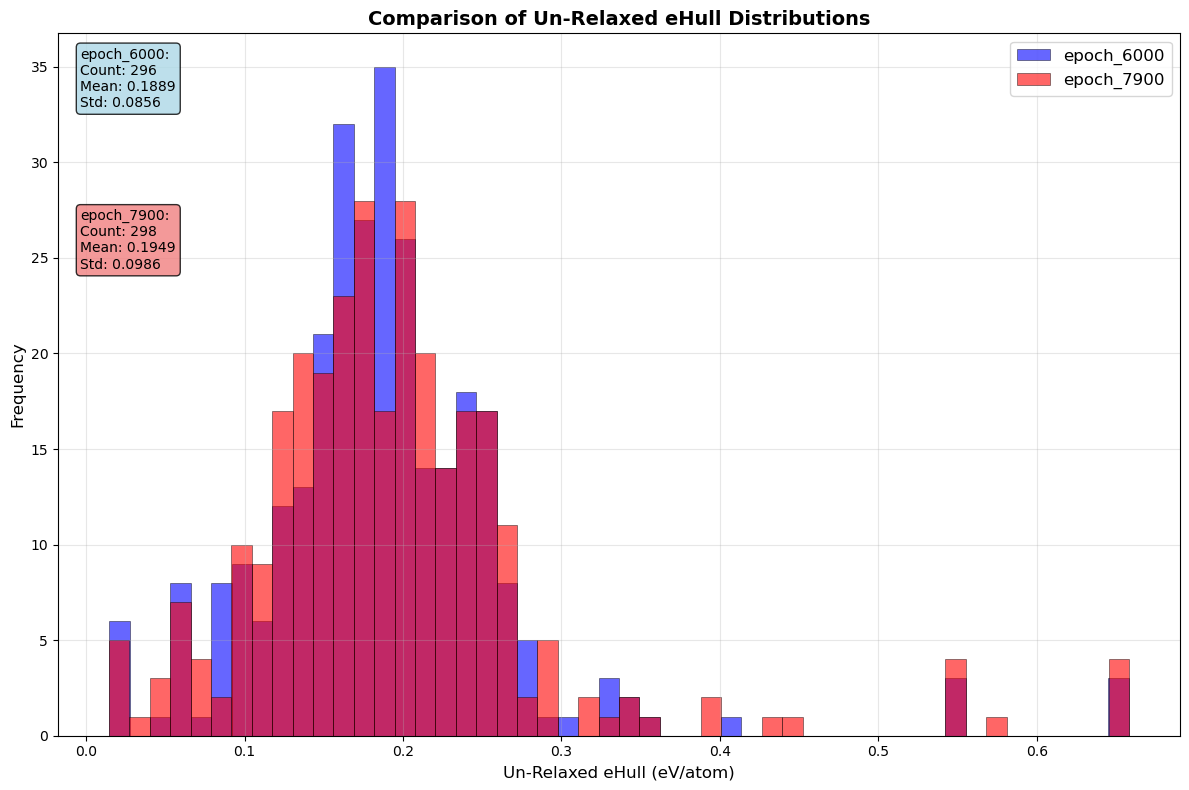

In [7]:
# Create the comparative histogram
if len(datasets) > 1:
    create_comparative_histogram(datasets, title="Comparison of Un-Relaxed eHull Distributions")
else:
    print("Need at least 2 datasets for comparison")


In [8]:
# Load and plot training logs
def load_training_logs(file_path):
    """Load training log file and return DataFrame"""
    expanded_path = os.path.expanduser(file_path)
    print(f"Loading training logs from: {expanded_path}")
    
    try:
        # Read the log file
        with open(expanded_path, 'r') as f:
            lines = f.readlines()
        
        # Find the header line
        header_line = None
        data_start_idx = 0
        
        for i, line in enumerate(lines):
            if 'epoch' in line and 't_loss' in line and 'v_loss' in line:
                header_line = line.strip()
                data_start_idx = i + 1
                break
        
        if header_line is None:
            print("Could not find header line in log file")
            return None
        
        print(f"Found header: {header_line}")
        
        # Parse header to get column names
        columns = header_line.split()
        print(f"Columns: {columns}")
        
        # Parse data lines
        data_rows = []
        for line in lines[data_start_idx:]:
            line = line.strip()
            if line and not line.startswith('#'):  # Skip empty lines and comments
                try:
                    values = line.split()
                    if len(values) == len(columns):
                        # Convert to float, handling any non-numeric values
                        row_data = []
                        for val in values:
                            try:
                                row_data.append(float(val))
                            except ValueError:
                                row_data.append(np.nan)
                        data_rows.append(row_data)
                except:
                    continue
        
        if not data_rows:
            print("No valid data rows found")
            return None
        
        # Create DataFrame
        df = pd.DataFrame(data_rows, columns=columns)
        print(f"Loaded {len(df)} rows of training data")
        print(f"Data shape: {df.shape}")
        
        return df
        
    except FileNotFoundError:
        print(f"Error: File not found: {expanded_path}")
        return None
    except Exception as e:
        print(f"Error loading file: {e}")
        return None

def plot_training_losses(df, figsize=(8, 20), loss_suffixes=None):
    """Plot training and validation losses in subfigures arranged vertically
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing training logs
    figsize : tuple
        Figure size for the plot
    loss_suffixes : list of str, optional
        List of suffixes to append to 't_loss' and 'v_loss' for different subloss types
        Default: ['', '_g', '_w', '_a', '_xyz', '_l']
        Examples: ['', '_g', '_w'] for total, G, and W losses only
    """
    if df is None:
        print("No data to plot")
        return
    
    # Default loss suffixes if not provided
    if loss_suffixes is None:
        loss_suffixes = ['', '_g', '_w', '_a', '_xyz', '_l']
    
    # Define loss pairs (training, validation) based on suffixes
    loss_pairs = []
    for suffix in loss_suffixes:
        train_col = f't_loss{suffix}'
        val_col = f'v_loss{suffix}'
        
        # Create title based on suffix
        if suffix == '':
            title = 'Total Loss'
        elif suffix == '_g':
            title = 'G Loss (Space Group)'
        elif suffix == '_w':
            title = 'W Loss (Wyckoff)'
        elif suffix == '_a':
            title = 'A Loss (Atom Types)'
        elif suffix == '_xyz':
            title = 'XYZ Loss (Coordinates)'
        elif suffix == '_l':
            title = 'L Loss (Lattice)'
        else:
            title = f'Loss{suffix}'
        
        loss_pairs.append((train_col, val_col, title))
    
    # Create subplots in a single column
    n_pairs = len(loss_pairs)
    n_cols = 1
    n_rows = n_pairs
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    
    # Handle case where there's only one subplot
    if n_rows == 1:
        axes = [axes]
    
    # Plot each loss pair
    for i, (train_col, val_col, title) in enumerate(loss_pairs):
        ax = axes[i]
        
        if train_col in df.columns and val_col in df.columns:
            # Plot training and validation losses
            ax.plot(df['epoch'], df[train_col], 'o-', label='Training', color='blue', alpha=0.7)
            ax.plot(df['epoch'], df[val_col], 's-', label='Validation', color='red', alpha=0.7)
            
            ax.set_xlabel('Epoch')
            ax.set_ylabel('Loss')
            ax.set_title(title)
            ax.legend()
            ax.grid(True, alpha=0.3)
            #ax.set_xscale('log')  # Set log scale for x-axis
            #ax.set_xlim([4200, 5000])

            # Add some statistics
            train_min = df[train_col].min()
            val_min = df[val_col].min()
            ax.text(0.02, 0.98, f'Train min: {train_min:.4f} \n Val min: {val_min:.4f}', 
                   transform=ax.transAxes, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        else:
            ax.text(0.5, 0.5, f'Columns {train_col}, {val_col} not found', 
                   ha='center', va='center', transform=ax.transAxes)
            ax.set_title(title)
    
    plt.tight_layout()
    plt.show()

# Load the training log file
#log_file_path = "~/private/datafile/crystalgpt/csp/alex20/csp-e478c/adam_bs_8000_lr_0.0001_decay_0_clip_1_A_119_W_28_N_21_a_1_w_1_l_1_Nf_5_Kx_16_Kl_4_h0_64_l_8_H_16_k_64_m_64_e_32_drop_0.3_0.1/data.txt"

#log_file_path = "/home/user_wanglei/private/datafile/crystalgpt/csp/alex20/csp-92792/adam_bs_8000_lr_0.0001_decay_0_clip_1_A_119_W_28_N_21_a_1_w_1_l_1_Nf_5_Kx_16_Kl_4_h0_256_l_16_H_16_k_64_m_64_e_32_drop_0.1_0.1/data.txt"

#log_file_path = "~/private/datafile/crystalgpt/csp/alex20/csp-6000f/adam_bs_8000_lr_0.0001_decay_0_clip_1_A_119_W_28_N_21_a_1_w_1_l_1_Nf_5_Kx_16_Kl_4_h0_256_l_16_H_16_k_64_m_64_e_32_drop_0.1_0.1/data.txt"

#log_file_path = "~/private/datafile/crystalgpt/csp/alex20s/csp-07d3f/adam_bs_8000_lr_0.0001_decay_0_clip_1_A_119_W_28_N_21_a_1_w_1_l_1_Nf_5_Kx_16_Kl_4_h0_256_l_16_H_16_k_64_m_64_e_32_drop_0.1_0.1/data.txt"

#log_file_path = "~/private/datafile/crystalgpt/csp/alex20s/csp-a20de/adam_bs_8000_lr_0.0001_decay_0_clip_1_A_119_W_28_N_21_a_1_w_1_l_1_Nf_5_Kx_16_Kl_4_h0_256_l_16_H_16_k_64_m_64_e_32_drop_0.1_0.1/data.txt"

#log_file_path = "/home/user_wanglei/private/datafile/crystalgpt/csp/alex20s/csp-0d128/adam_bs_8000_lr_0.0001_decay_0_clip_1_A_119_W_28_N_21_a_1_w_1_l_1_Nf_5_Kx_16_Kl_4_h0_256_l_16_H_8_k_16_m_128_e_128_drop_0.1_0.1/data.txt"

log_file_path = '/home/user_wanglei/private/datafile/crystalgpt/csp/alex20s/csp-f5171/adam_bs_8000_lr_0.0001_decay_0_clip_1_A_119_W_28_N_21_a_1_w_1_l_1_Nf_5_Kx_16_Kl_4_h0_256_l_16_H_8_k_32_m_256_e_256_drop_0.1_0.1/data.txt'


# Load the data
training_df = load_training_logs(log_file_path)


Loading training logs from: /home/user_wanglei/private/datafile/crystalgpt/csp/alex20s/csp-f5171/adam_bs_8000_lr_0.0001_decay_0_clip_1_A_119_W_28_N_21_a_1_w_1_l_1_Nf_5_Kx_16_Kl_4_h0_256_l_16_H_8_k_32_m_256_e_256_drop_0.1_0.1/data.txt
Found header: epoch t_loss v_loss t_loss_g v_loss_g t_loss_w v_loss_w t_loss_a v_loss_a t_loss_xyz v_loss_xyz t_loss_l v_loss_l
Columns: ['epoch', 't_loss', 'v_loss', 't_loss_g', 'v_loss_g', 't_loss_w', 'v_loss_w', 't_loss_a', 'v_loss_a', 't_loss_xyz', 'v_loss_xyz', 't_loss_l', 'v_loss_l']
Loaded 100 rows of training data
Data shape: (100, 13)


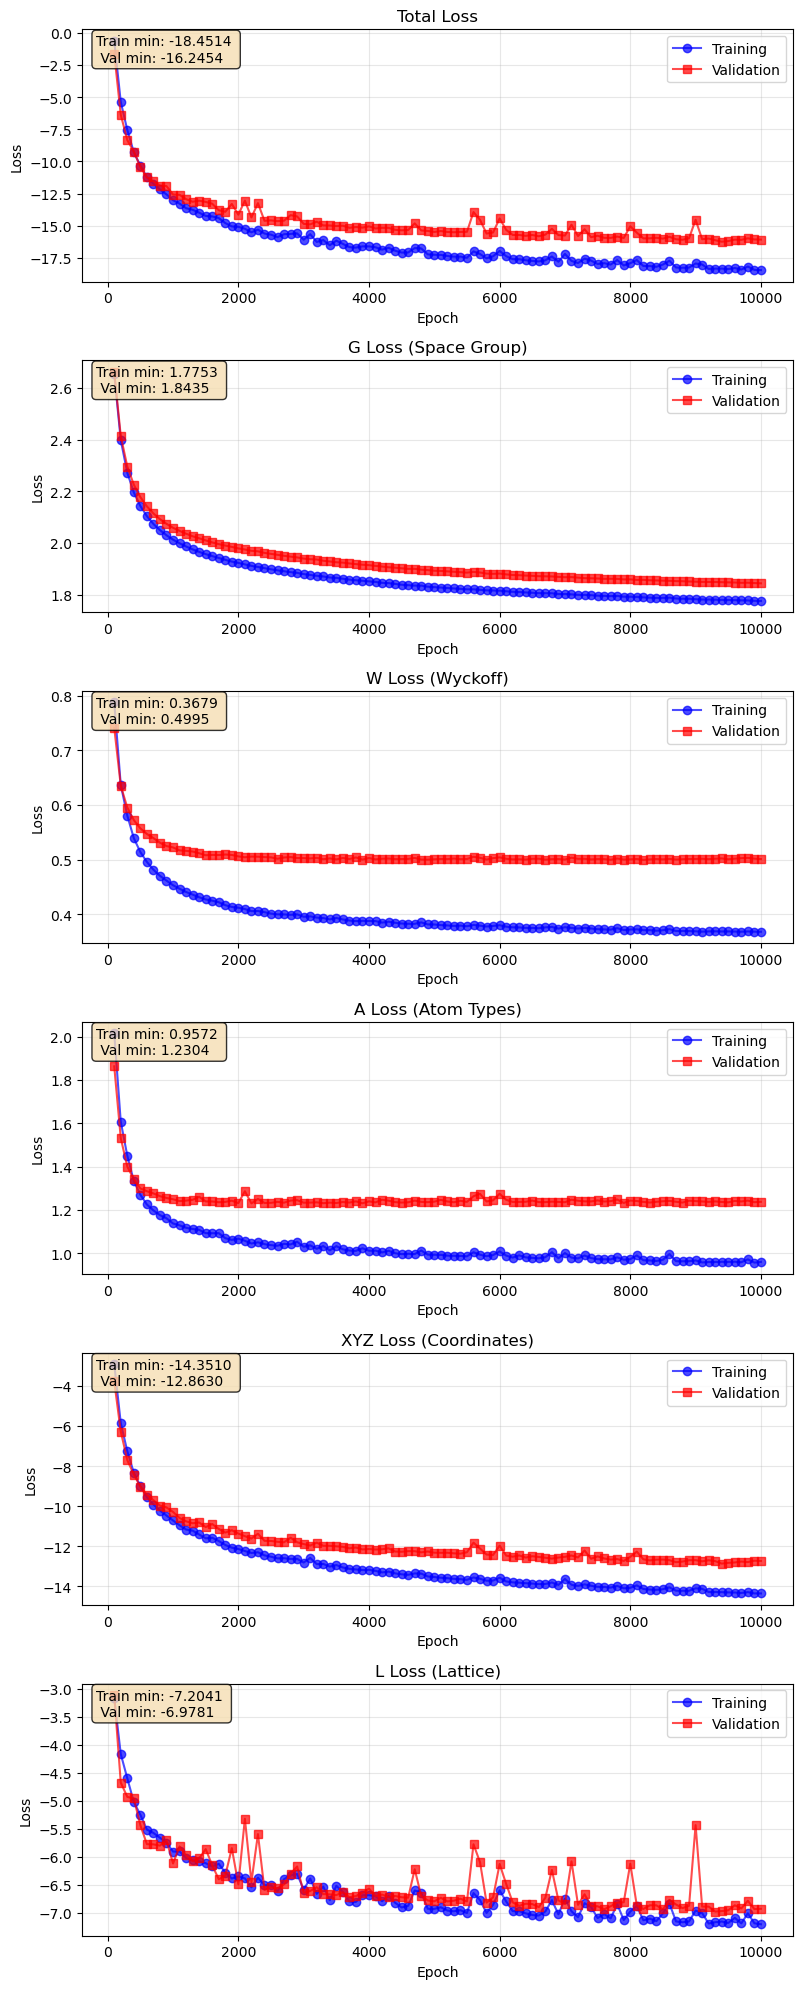

In [9]:

plot_training_losses(training_df)

Loading training logs from: /home/user_wanglei/private/datafile/crystalgpt/csp/alex20s/csp-a20de/adam_bs_8000_lr_0.0001_decay_0_clip_1_A_119_W_28_N_21_a_1_w_1_l_1_Nf_5_Kx_16_Kl_4_h0_256_l_16_H_16_k_64_m_64_e_32_drop_0.1_0.1/data.txt
Found header: epoch t_loss v_loss t_loss_g v_loss_g t_loss_w v_loss_w t_loss_a v_loss_a t_loss_xyz v_loss_xyz t_loss_l v_loss_l
Columns: ['epoch', 't_loss', 'v_loss', 't_loss_g', 'v_loss_g', 't_loss_w', 'v_loss_w', 't_loss_a', 'v_loss_a', 't_loss_xyz', 'v_loss_xyz', 't_loss_l', 'v_loss_l']
Loaded 52 rows of training data
Data shape: (52, 13)
Loading training logs from: /home/user_wanglei/private/datafile/crystalgpt/csp/alex20s/csp-0d128/adam_bs_8000_lr_0.0001_decay_0_clip_1_A_119_W_28_N_21_a_1_w_1_l_1_Nf_5_Kx_16_Kl_4_h0_256_l_16_H_8_k_16_m_128_e_128_drop_0.1_0.1/data.txt
Found header: epoch t_loss v_loss t_loss_g v_loss_g t_loss_w v_loss_w t_loss_a v_loss_a t_loss_xyz v_loss_xyz t_loss_l v_loss_l
Columns: ['epoch', 't_loss', 'v_loss', 't_loss_g', 'v_loss_g'

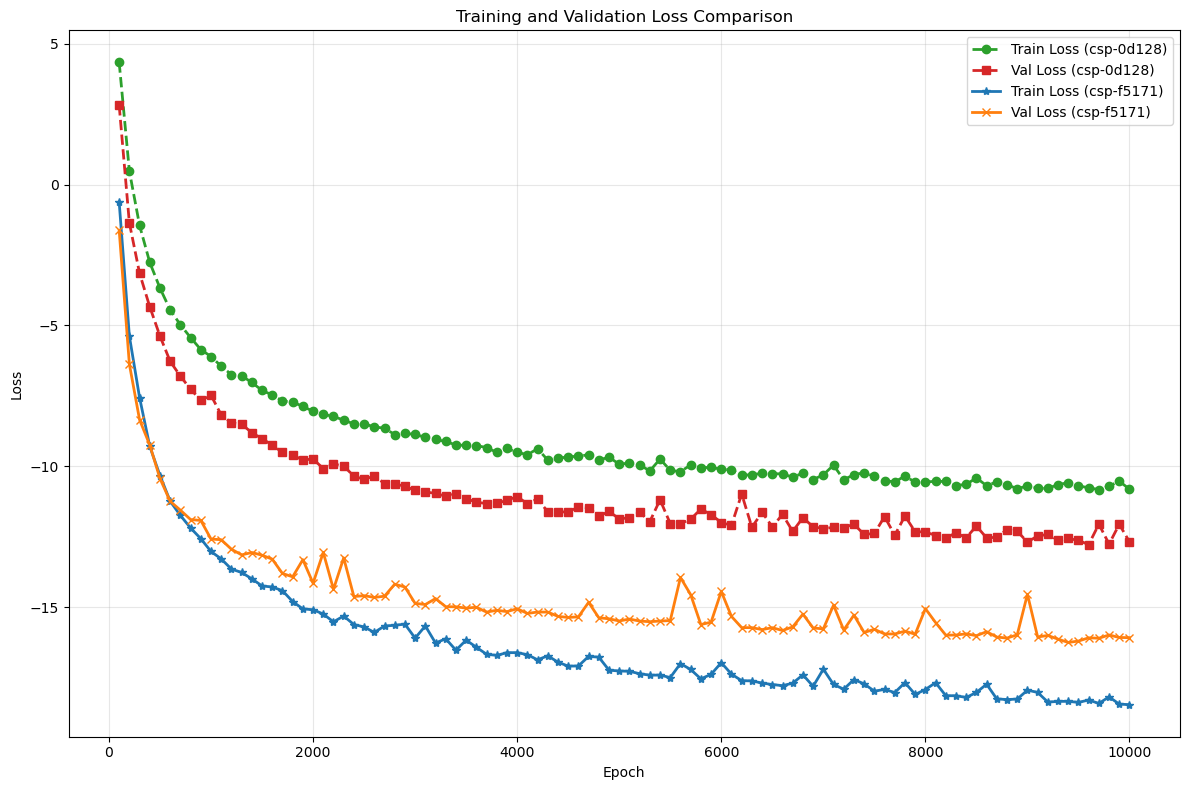

In [10]:
# Plot train and validation loss curves from two log files together
log_file_1 = "/home/user_wanglei/private/datafile/crystalgpt/csp/alex20s/csp-a20de/adam_bs_8000_lr_0.0001_decay_0_clip_1_A_119_W_28_N_21_a_1_w_1_l_1_Nf_5_Kx_16_Kl_4_h0_256_l_16_H_16_k_64_m_64_e_32_drop_0.1_0.1/data.txt"

log_file_2 = "/home/user_wanglei/private/datafile/crystalgpt/csp/alex20s/csp-0d128/adam_bs_8000_lr_0.0001_decay_0_clip_1_A_119_W_28_N_21_a_1_w_1_l_1_Nf_5_Kx_16_Kl_4_h0_256_l_16_H_8_k_16_m_128_e_128_drop_0.1_0.1/data.txt"

log_file_3 = '/home/user_wanglei/private/datafile/crystalgpt/csp/alex20s/csp-f5171/adam_bs_8000_lr_0.0001_decay_0_clip_1_A_119_W_28_N_21_a_1_w_1_l_1_Nf_5_Kx_16_Kl_4_h0_256_l_16_H_8_k_32_m_256_e_256_drop_0.1_0.1/data.txt'

df1 = load_training_logs(log_file_1)
df2 = load_training_logs(log_file_2)
df3 = load_training_logs(log_file_3)

plt.figure(figsize=(12, 8))

append = ''

# Plot for log_file_1
#plt.plot(df1['epoch'], df1['t_loss'+append], label='Train Loss (csp-07d3f)', color='tab:blue', linewidth=2)
#plt.plot(df1['epoch'], df1['v_loss'+append], label='Val Loss (csp-07d3f)', #color='tab:orange', linewidth=2)

# Plot for log_file_2
plt.plot(df2['epoch'], df2['t_loss'+append], 'o--', label='Train Loss (csp-0d128)', color='tab:green', linewidth=2)
plt.plot(df2['epoch'], df2['v_loss'+append], 's--', label='Val Loss (csp-0d128)', color='tab:red', linewidth=2)

# Plot for log_file_3
plt.plot(df3['epoch'], df3['t_loss'+append], '*-', label='Train Loss (csp-f5171)', color='tab:blue', linewidth=2)
plt.plot(df3['epoch'], df3['v_loss'+append], 'x-', label='Val Loss (csp-f5171)', color='tab:orange', linewidth=2)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [11]:
import pickle
import numpy as np

# Path to the checkpoint file
checkpoint_path = "/home/user_wanglei/private/datafile/crystalgpt/csp/alex20s/csp-f5171/adam_bs_8000_lr_0.0001_decay_0_clip_1_A_119_W_28_N_21_a_1_w_1_l_1_Nf_5_Kx_16_Kl_4_h0_256_l_16_H_8_k_32_m_256_e_256_drop_0.1_0.1//epoch_005000.pkl"

# Load the checkpoint
with open(checkpoint_path, "rb") as f:
    checkpoint = pickle.load(f)

# Get the model parameters (usually under 'params' or similar key)
params = checkpoint.get('params', None)
if params is None:
    raise ValueError("Could not find `params` key in checkpoint, found keys: %s" % list(checkpoint.keys()))

def get_total_bytes(tree):
    total = 0
    # Recursively visit all leaves in the params pytree
    if isinstance(tree, dict):
        for v in tree.values():
            total += get_total_bytes(v)
    elif isinstance(tree, (list, tuple)):
        for item in tree:
            total += get_total_bytes(item)
    elif hasattr(tree, 'nbytes'):
        total += tree.nbytes
    elif isinstance(tree, np.ndarray):
        total += tree.nbytes
    else:
        # If something unexpected, try string conversion and skip
        pass
    return total

total_bytes = get_total_bytes(params)
print(f"Model parameters take up approximately {total_bytes / (1024**2):.2f} MB ({total_bytes} bytes)")


ERROR:2025-10-23 12:10:45,795:jax._src.xla_bridge:487: Jax plugin configuration error: Exception when calling jax_plugins.xla_cuda12.initialize()
Traceback (most recent call last):
  File "/home/user_wanglei/.local/lib/python3.13/site-packages/jax/_src/xla_bridge.py", line 485, in discover_pjrt_plugins
    plugin_module.initialize()
    ~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "/home/user_wanglei/.local/lib/python3.13/site-packages/jax_plugins/xla_cuda12/__init__.py", line 328, in initialize
    _check_cuda_versions(raise_on_first_error=True)
    ~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/user_wanglei/.local/lib/python3.13/site-packages/jax_plugins/xla_cuda12/__init__.py", line 285, in _check_cuda_versions
    local_device_count = cuda_versions.cuda_device_count()
RuntimeError: jaxlib/cuda/versions_helpers.cc:113: operation cuInit(0) failed: Unknown CUDA error 303; cuGetErrorName failed. This probably means that JAX was unable to load the CUDA libraries.


Model parameters take up approximately 52.78 MB (55344820 bytes)
